In [2]:
import cv2
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Importing the model

In [2]:
model=tf.keras.models.load_model('drowiness_new20.h5')
model2=tf.keras.models.load_model('ResNet-50.h5')

## preparing the input image

In [3]:
def prepare(filepath,IMG_SIZE, face_cas="haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

## final prediction

In [4]:
def predict(image,imgsize1,imgsize2, prepare):
    prediction1 = model.predict([prepare(image,imgsize1)])
    prediction2 = model2.predict([prepare(image,imgsize2)])
    if(np.argmax(prediction1)==2 or np.argmax(prediction1)==0):
        status1 = "Drowsy!!"
    else:
        status1 = "Active!!"

    if(np.argmax(prediction2)==0 or np.argmax(prediction2)==1):
        status2 = "Frustrated"
    elif (np.argmax(prediction2)==2 or np.argmax(prediction2)==5):
        status2 = "Confused"
    elif (np.argmax(prediction2)==3 or np.argmax(prediction2)==6):
        status2 = "Engaged"
    else:
        status2 = "Bored"
    return (status1 + " " + status2)

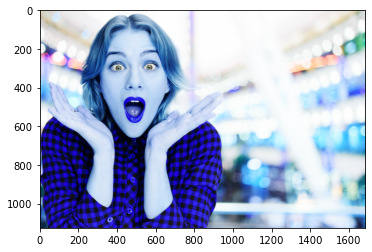

In [10]:
frame = cv2.imread("surp.jpg")
plt.imshow(frame)

In [14]:
predict("happy.jpg",145,197,prepare)

'Drowsy!! Engaged'

In [1]:
frame = cv2.imread("happy.jpg",cv2.IMREAD_COLOR)
plt.imshow(frame)

NameError: name 'cv2' is not defined